In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as sc #scientific python
import statsmodels.api as sm

from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


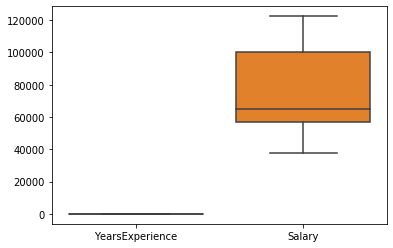

In [5]:
sns.boxplot(data=df)
plt.show()

Ofcourse the above boxplot shows like this because in the YearsExperience we have the Maximum value is 10.5 and in Salary we have maximum value is 122391 and that's the reason YearsExperience Boxplot is like negligible.

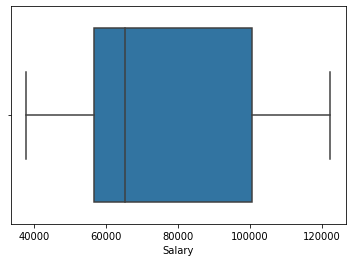

In [6]:
sns.boxplot(data=df, x='Salary')
plt.show()

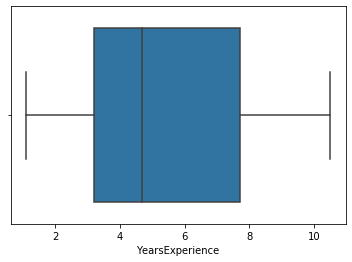

In [7]:
sns.boxplot(data=df, x='YearsExperience')
plt.show()

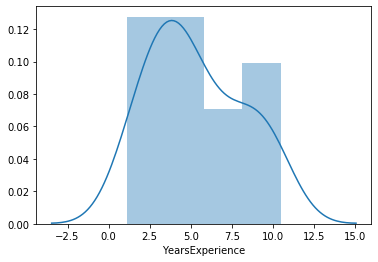

In [8]:
sns.distplot(df['YearsExperience'])
plt.show()

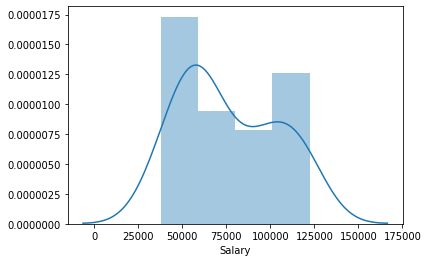

In [9]:
sns.distplot(df['Salary'])
plt.show()

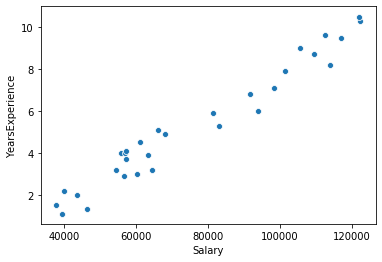

In [10]:
sns.scatterplot(x='Salary', y='YearsExperience',data=df)
plt.show()

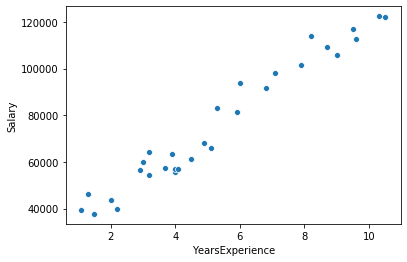

In [11]:
sns.scatterplot(x='YearsExperience', y='Salary',data=df)
plt.show()

From the scatterplots we can conclude that there is a linear relationship between the two variables Salary and YearsExperience.

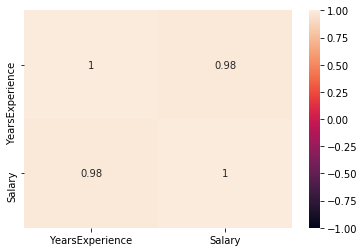

In [12]:
sns.heatmap(data=df.corr(), vmin=-1,
                            vmax=1,
                            annot=True)
plt.show()

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
corr,_ = pearsonr(df['YearsExperience'],df['Salary'])
print('Pearsons correlation : %.3f ' % corr)

Pearsons correlation : 0.978 


In [15]:
X = df['YearsExperience']
y = df['Salary']

In [16]:
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [17]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [18]:
X = sm.add_constant(X)
X

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
5,1.0,2.9
6,1.0,3.0
7,1.0,3.2
8,1.0,3.2
9,1.0,3.7


In [19]:
LinearRegression1 = sm.OLS(y,X).fit()
LinearRegression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        20:32:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
LinearRegression1.rsquared*100

95.69566641435085

In [21]:
ypred = LinearRegression1.predict(X)
print(ypred)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64


In [22]:
df['ypred'] = ypred

In [23]:
df

,YearsExperience,Salary,ypred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [24]:
rmse_df_linear_regression_1 = np.sqrt(mean_squared_error(y,df['ypred']))
rmse_df_linear_regression_1

5592.043608760661

In [25]:
X = df['YearsExperience']
y = df['Salary']

In [26]:
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [27]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [28]:
LinearRegression2 = sm.OLS(y,X).fit()
LinearRegression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    2.56e-24
Time:                        20:32:05   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
LinearRegression2.rsquared*100

97.30791806609133

In [30]:
df['ypred'] = LinearRegression2.predict(X)
df

,YearsExperience,Salary,ypred
0,1.1,39343.0,14580.432300
1,1.3,46205.0,17231.419991
2,1.5,37731.0,19882.407682
3,2.0,43525.0,26509.876909
4,2.2,39891.0,29160.864600
5,2.9,56642.0,38439.321518
6,3.0,60150.0,39764.815363
7,3.2,54445.0,42415.803054
8,3.2,64445.0,42415.803054
9,3.7,57189.0,49043.272281


In [31]:
rmse_df_linear_regression_2 = np.sqrt(mean_squared_error(y,df['ypred']))
rmse_df_linear_regression_2

13231.208713249669

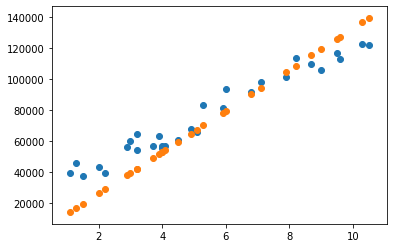

In [32]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.scatter(df['YearsExperience'],df['ypred'])
plt.show()

y = mx + c

RMSE - 5592.0436
With Constants to mx, R-Squared Value - 95%

RMSE - 13231.2087
Without Constants to mx, R-Squared Value - 97%

From the both RMSE values that which we have done one with the constants and one without constants and from those we can conclude that the one with the constants gave us the less RMSE value as compare to the one without constants so we should prefer the one with the constants.